# Sex Distribution in STEM Majors

## Fernando Mazzoni
## June 5th 2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

%matplotlib inline

# Background

Using "Bachelors’ Degrees by Major and Sex, Massachusetts, 2015-2016"
by The National Center for Education Statistics , the following journal shows the sex distribution of Massachusetts college students in stem fields 

In [2]:
Dataset = pd.read_csv("bachelors_major_ma_2015_16.csv")

In [3]:
Dataset[:5]

,UnitID,Institution Name,City location of institution (HD2015),Institution open to the general public (HD2015),Applicants total (ADM2015_RV),Admissions total (ADM2015_RV),Enrolled total (ADM2015_RV),Unnamed: 7,Grand total (C2016_A First major Agriculture Agriculture Operations and Related Sciences Bachelor's degree),Grand total men (C2016_A First major Agriculture Agriculture Operations and Related Sciences Bachelor's degree),...,Grand total women (C2016_A First major Health Professions and Related Programs Bachelor's degree),Grand total (C2016_A First major Business Management Marketing and Related Support Services Bachelor's degree),Grand total men (C2016_A First major Business Management Marketing and Related Support Services Bachelor's degree),Grand total women (C2016_A First major Business Management Marketing and Related Support Services Bachelor's degree),Grand total (C2016_A First major History Bachelor's degree),Grand total men (C2016_A First major History Bachelor's degree),Grand total women (C2016_A First major History Bachelor's degree),Grand total (C2016_A First major Grand total Bachelor's degree),Grand total men (C2016_A First major Grand total Bachelor's degree),Grand total women (C2016_A First major Grand total Bachelor's degree)
0,419147,Ailano School of Cosmetology,Brockton,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,476735,Alexander Academy,Fitchburg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,487144,American Academy of Personal Training-Boston C...,Boston,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,164447,American International College,Springfield,1.0,2060.0,1301.0,355.0,NaN,NaN,NaN,...,85.0,45.0,33.0,12.0,3.0,3.0,0.0,279.0,111.0,168.0
4,164465,Amherst College,Amherst,1.0,8568.0,1210.0,477.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29.0,17.0,12.0,432.0,224.0,208.0


Particulary Engineering, Physical Sciences, and Math majors are sampled in this journal

In [4]:
Major = Dataset[['Institution Name','Enrolled total (ADM2015_RV)',"Grand total men (C2016_A  First major  Engineering  Bachelor's degree)","Grand total women (C2016_A  First major  Engineering  Bachelor's degree)","Grand total men (C2016_A  First major  Physical Sciences  Bachelor's degree)","Grand total women (C2016_A  First major  Physical Sciences  Bachelor's degree)", "Grand total men (C2016_A  First major  Mathematics and Statistics  Bachelor's degree)","Grand total women (C2016_A  First major  Mathematics and Statistics  Bachelor's degree)"]]
Major = Major.dropna()

Major.describe()

,Enrolled total (ADM2015_RV),Grand total men (C2016_A First major Engineering Bachelor's degree),Grand total women (C2016_A First major Engineering Bachelor's degree),Grand total men (C2016_A First major Physical Sciences Bachelor's degree),Grand total women (C2016_A First major Physical Sciences Bachelor's degree),Grand total men (C2016_A First major Mathematics and Statistics Bachelor's degree),Grand total women (C2016_A First major Mathematics and Statistics Bachelor's degree)
count,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,1550.687500,164.312500,63.000000,22.62500,16.125000,26.062500,14.875000
std,1226.493306,175.746681,73.965758,23.38625,13.744696,34.607261,16.280356
min,114.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,800.750000,14.500000,3.750000,6.00000,6.000000,3.000000,4.500000
50%,1347.000000,103.000000,35.000000,15.00000,11.500000,12.000000,10.000000
75%,1665.000000,294.000000,80.750000,31.75000,28.250000,31.500000,14.750000
max,4702.000000,519.000000,232.000000,76.00000,39.000000,125.000000,57.000000


In [5]:
unis = Major[0 :1]
for x in range(len(Major)):
    unis = np.vstack((unis , Major[x+1 :(x+2 )] ))

print(unis)

[["Bard College at Simon's Rock" 117.0 3.0 1.0 1.0 1.0 3.0 2.0]
 ['Boston University' 3629.0 276.0 101.0 43.0 33.0 57.0 41.0]
 ['Eastern Nazarene College' 114.0 4.0 0.0 1.0 0.0 0.0 1.0]
 ['Harvard University' 1660.0 40.0 37.0 62.0 27.0 125.0 57.0]
 ['Massachusetts Institute of Technology' 1106.0 236.0 232.0 50.0 36.0 58.0
  14.0]
 ['Merrimack College' 828.0 24.0 3.0 3.0 1.0 3.0 10.0]
 ['Northeastern University' 2797.0 519.0 148.0 28.0 24.0 23.0 17.0]
 ['Smith College' 609.0 0.0 33.0 0.0 39.0 0.0 12.0]
 ['Suffolk University' 1334.0 17.0 4.0 8.0 3.0 3.0 0.0]
 ['Tufts University' 1360.0 110.0 60.0 22.0 14.0 13.0 10.0]
 ['University of Massachusetts-Amherst' 4702.0 388.0 74.0 76.0 32.0 70.0
  38.0]
 ['University of Massachusetts-Boston' 1680.0 7.0 1.0 18.0 7.0 11.0 9.0]
 ['University of Massachusetts-Dartmouth' 1430.0 137.0 23.0 9.0 9.0 11.0
  5.0]
 ['University of Massachusetts-Lowell' 1633.0 348.0 62.0 22.0 18.0 20.0 7.0]
 ['Western New England University' 719.0 96.0 21.0 7.0 7.0 2.0 3.0

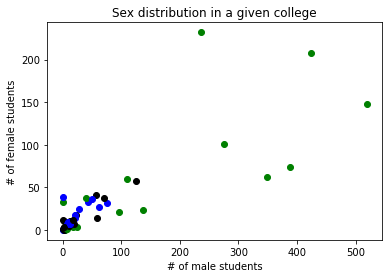

In [20]:
#first trial

for i in range(len(unis[:,1])):
    name = (unis[i,0])
    enroll = (unis[i,1])
   
    m_engin = (unis[i,2])
    w_engin =(unis[i,3])
    
    m_phys = (unis[i,4])
    w_phys =(unis[i,5])
    
    m_math = (unis[i,6])
    w_math = (unis[i,7])
    
    plt.plot(m_engin, w_engin , color='green', marker='o')
    plt.plot(m_phys,w_phys , color='blue', marker='o')
    plt.plot(m_math, w_math , color='black', marker='o')
    
plt.title("Sex distribution in a given college")
plt.xlabel('# of male students')
plt.ylabel('# of female students')
plt.show()

The 'null hypothisis' is that women and men are present in the stem field equally. To test this out I plotted and gathered the statistics of each major.

# Testing the  Null Hypothosis

To constrain the dataset to just the majors of interest and remove any NaNs, I did the following

In [22]:
Major = Dataset[['Institution Name','Enrolled total (ADM2015_RV)',"Grand total men (C2016_A  First major  Engineering  Bachelor's degree)","Grand total women (C2016_A  First major  Engineering  Bachelor's degree)","Grand total men (C2016_A  First major  Physical Sciences  Bachelor's degree)","Grand total women (C2016_A  First major  Physical Sciences  Bachelor's degree)", "Grand total men (C2016_A  First major  Mathematics and Statistics  Bachelor's degree)","Grand total women (C2016_A  First major  Mathematics and Statistics  Bachelor's degree)"]]
Major = Major.dropna()

Major.head()

,Institution Name,Enrolled total (ADM2015_RV),Grand total men (C2016_A First major Engineering Bachelor's degree),Grand total women (C2016_A First major Engineering Bachelor's degree),Grand total men (C2016_A First major Physical Sciences Bachelor's degree),Grand total women (C2016_A First major Physical Sciences Bachelor's degree),Grand total men (C2016_A First major Mathematics and Statistics Bachelor's degree),Grand total women (C2016_A First major Mathematics and Statistics Bachelor's degree)
11,Bard College at Simon's Rock,117.0,3.0,1.0,1.0,1.0,3.0,2.0
28,Boston University,3629.0,276.0,101.0,43.0,33.0,57.0,41.0
47,Eastern Nazarene College,114.0,4.0,0.0,1.0,0.0,0.0,1.0
68,Harvard University,1660.0,40.0,37.0,62.0,27.0,125.0,57.0
96,Massachusetts Institute of Technology,1106.0,236.0,232.0,50.0,36.0,58.0,14.0


## Engineer Model

The data is then further constrained to just Men Engineering Majors and to just Women engineering Majors. To see if there is a linear relationship between the # of Men and Women engineering Majors a regression fit was performed.

In [9]:
d_m_engin = Major["Grand total men (C2016_A  First major  Engineering  Bachelor's degree)"]
d_w_engin = Major["Grand total women (C2016_A  First major  Engineering  Bachelor's degree)"]


engin_model = smf.ols(formula = 'd_w_engin ~ d_m_engin', data = Major)

est = engin_model.fit()
est.summary()

C:\Users\ferna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              d_w_engin   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     17.69
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           0.000880
Time:                        10:41:06   Log-Likelihood:                -84.508
No. Observations:                  16   AIC:                             173.0
Df Residuals:                      14   BIC:                             174.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3304     17.684      0.641      0.532     -26.598      49.259
d_m_engin      0.3145      0.075      4.206      0.001       0.154       0.475
==============================================================================
Omnibus:                       16.156   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.172
Skew:                           1.698   Prob(JB):                     0.000837
Kurtosis:                       6.119   Cond. No.                         329.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The following shows a plot of Engineering  Men v. Women Majors. Shown in black is the expected trend if there was an equal # of Male and Female students. Shown in red is the trend for engineering majors.

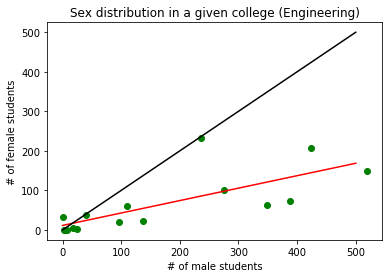

In [24]:
plt.scatter(d_m_engin, d_w_engin, color='green', marker='o')
plt.title("Sex distribution in a given college (Engineering)")
plt.xlabel('# of male students')
plt.ylabel('# of female students')

o_x = np.linspace(0,500,100) # 100 linearly spaced numbers
o_y = 11.3304 + 0.3145*o_x
plt.plot(o_x , o_y, color = 'red')


p_x = o_x
plt.plot(p_x , p_x, color = 'black')


plt.show()

The statistics can be obtained and then used to see if the null hypothesis is a valid model.

In [26]:
n_obs = len(d_w_engin)


mean_w = np.mean(d_w_engin)
std_w = np.std(d_w_engin)


mean_m =  np.mean(d_m_engin)
std_m = np.std(d_m_engin)


obs_diff = np.abs( mean_w - mean_m )

# Expected difference is that there is no difference
#(testing null hypothesis)
exp_diff = 0


#vng = (sd_g**2/n_g)
#vnb = (sd_b**2/n_b)
std_err = np.sqrt( ((std_w**2)/n_obs) + ((std_m**2)/n_obs)   )

z = (obs_diff - exp_diff)/std_err

#print(mean_w)
print('Sample difference:' , obs_diff)
print('Expected population difference:' , exp_diff)
print('Standard Error:' , std_err)
print('Z = ' , z)

Sample difference: 101.3125
Expected population difference: 0
Standard Error: 46.1556231973
Z =  2.19501965268


The same can then be performed for the physcial sciences and Math majors. It seems like a function could have been made to more quickly obtain the data.

## Physical Sciences Model

In [27]:
d_m_phys = Major["Grand total men (C2016_A  First major  Physical Sciences  Bachelor's degree)"]
d_w_phys = Major["Grand total women (C2016_A  First major  Physical Sciences  Bachelor's degree)"]


phys_model = smf.ols(formula = 'd_w_phys ~ d_m_phys', data = Major)

est = phys_model.fit()
est.summary()

C:\Users\ferna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               d_w_phys   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     11.42
Date:                Thu, 07 Jun 2018   Prob (F-statistic):            0.00449
Time:                        11:02:52   Log-Likelihood:                -59.345
No. Observations:                  16   AIC:                             122.7
Df Residuals:                      14   BIC:                             124.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2122      3.731      1.933      0.074      -0.791      15.215
d_m_phys       0.3939      0.117      3.379      0.004       0.144       0.644
==============================================================================
Omnibus:                       20.491   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.263
Skew:                           2.040   Prob(JB):                     2.41e-05
Kurtosis:                       6.904   Cond. No.                         45.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

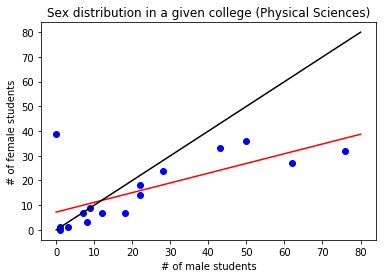

In [28]:

ln_inc_edu = plt.figure()
plt.scatter(d_m_phys, d_w_phys, color='Blue', marker='o')
plt.title("Sex distribution in a given college (Physical Sciences)")
plt.xlabel('# of male students')
plt.ylabel('# of female students')

o_x = np.linspace(0,80,100) # 100 linearly spaced numbers
o_y = 7.2122 + 0.3939*o_x
plt.plot(o_x , o_y, color = 'red')


p_x = o_x
plt.plot(p_x , p_x, color = 'black')

plt.show()


In [31]:
n_obs = len(d_w_engin)


mean_w = np.mean(d_w_phys)
std_w = np.std(d_w_phys)


mean_m =  np.mean(d_m_phys)
std_m = np.std(d_m_phys)


obs_diff = np.abs( mean_w - mean_m )

# Expected difference is that there is no difference
#(testing null hypothesis)
exp_diff = 0


#vng = (sd_g**2/n_g)
#vnb = (sd_b**2/n_b)
std_err = np.sqrt( ((std_w**2)/n_obs) + ((std_m**2)/n_obs)   )

z = (obs_diff - exp_diff)/std_err


print('Sample difference:' , obs_diff)
print('Expected population difference:' , exp_diff)
print('Standard Error:' , std_err)
print('Z = ' , z)

Sample difference: 6.5
Expected population difference: 0
Standard Error: 6.5662191842
Z =  0.989915173048


## Math Model

In [32]:
d_m_math = Major["Grand total men (C2016_A  First major  Mathematics and Statistics  Bachelor's degree)"]
d_w_math = Major["Grand total women (C2016_A  First major  Mathematics and Statistics  Bachelor's degree)"]


math_model = smf.ols(formula = 'd_w_math ~ d_m_math', data = Major)

est = math_model.fit()
est.summary()

C:\Users\ferna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               d_w_math   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     81.05
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           3.37e-07
Time:                        11:03:45   Log-Likelihood:                -51.503
No. Observations:                  16   AIC:                             107.0
Df Residuals:                      14   BIC:                             108.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5532      2.048      1.735      0.105      -0.840       7.946
d_m_math       0.4344      0.048      9.003      0.000       0.331       0.538
==============================================================================
Omnibus:                        2.127   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                0.496
Skew:                          -0.186   Prob(JB):                        0.780
Kurtosis:                       3.778   Cond. No.                         53.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

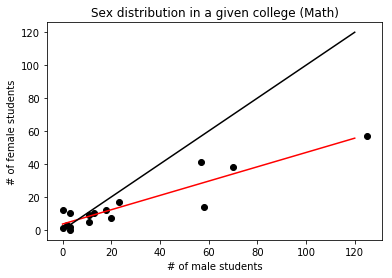

In [33]:

ln_inc_edu = plt.figure()
plt.scatter(d_m_math, d_w_math, color='black', marker='o')
plt.title("Sex distribution in a given college (Math)")
plt.xlabel('# of male students')
plt.ylabel('# of female students')

o_x = np.linspace(0,120,100) # 100 linearly spaced numbers
o_y = 3.5532 + 0.4344*o_x
plt.plot(o_x , o_y, color = 'red')


p_x = o_x
plt.plot(p_x , p_x, color = 'black')


plt.show()


In [35]:
n_obs = len(d_w_engin)


mean_w = np.mean(d_w_math)
std_w = np.std(d_w_math)


mean_m =  np.mean(d_m_math)
std_m = np.std(d_m_math)


obs_diff = np.abs( mean_w - mean_m )

# Expected difference is that there is no difference
#(testing null hypothesis)
exp_diff = 0


#vng = (sd_g**2/n_g)
#vnb = (sd_b**2/n_b)
std_err = np.sqrt( ((std_w**2)/n_obs) + ((std_m**2)/n_obs)   )

z = (obs_diff - exp_diff)/std_err


print('Sample difference:' , obs_diff)
print('Expected population difference:' , exp_diff)
print('Standard Error:' , std_err)
print('Z = ' , z)

Sample difference: 11.1875
Expected population difference: 0
Standard Error: 9.25774327506
Z =  1.20844785469


# Conclusion

The plots show that many colleges in Massachusetss do have more Stem Male majors than female Majors. A challenge was repeating/copy&pasting the code for each major.

# Junk

In [28]:
plt.hist?

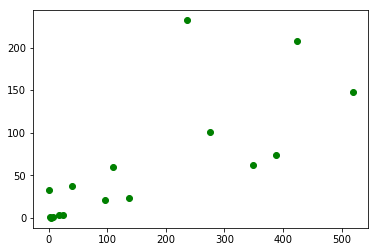

3637.0


In [8]:
for i in range(len(unis[:,1])):
    name = (unis[i,0])
    enroll = (unis[i,1])
   
    m_engin = (unis[i,2])
    w_engin =(unis[i,3])
    
    loc_engin = m_engin + w_engin
    tot_engin = tot_engin + loc_engin
    
    if m_engin or w_engin > 0:
        plt.plot(m_engin, w_engin , color='green', marker='o')
    
plt.show()   

print(tot_engin)

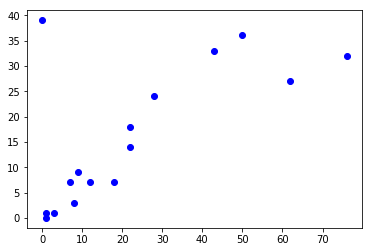

620.0


In [9]:
for i in range(len(unis[:,1])):    
    m_phys = (unis[i,4])
    w_phys =(unis[i,5])
    
    loc_phys = m_phys + w_phys
    tot_phys = tot_phys + loc_phys
    
    if m_phys or w_phys > 0:
        plt.plot(m_phys, w_phys, color='blue', marker='o')
plt.show()

print(tot_phys)

In [19]:

m_math = (unis[0,6])
w_math = (unis[0,7])
    
loc_math = m_math + w_math
pcent_w = w_math/loc_math


for i in range(len(unis[:,1])-1):   
    
    
    
    m_math = (unis[i+1,6])
    w_math = (unis[i+1,7])
    
    loc_math = m_math + w_math
    pcent_w = w_math/loc_math

    concatenate((unis[0,6]),m_math)
        
plt.hist(pcent_w, bins = 30)
plt.show()

TypeError: 'float' object cannot be interpreted as an integer

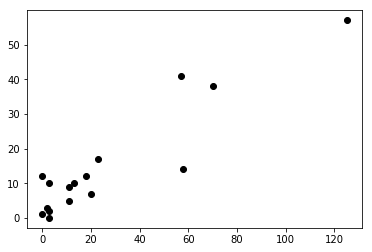

655.0


In [10]:
for i in range(len(unis[:,1])):   
    m_math = (unis[i,6])
    w_math = (unis[i,7])
    
    loc_math = m_math + w_math
    tot_math = tot_math + loc_math
    if m_math or w_math > 0:
        plt.plot(m_math, w_math , color='black', marker='o')
    
plt.show()

print(tot_math)

In [24]:
print(unis[0,:])
print(unis[:,:])

['Ailano School of Cosmetology' nan nan nan nan nan nan nan]
[['Ailano School of Cosmetology' nan nan ..., nan nan nan]
 ['Alexander Academy' nan nan ..., nan nan nan]
 ['American Academy of Personal Training-Boston Campus' nan nan ..., nan
  nan nan]
 ..., 
 ['Williams College' 551.0 nan ..., 38.0 22.0 14.0]
 ['Worcester Polytechnic Institute' 1093.0 424.0 ..., 7.0 18.0 12.0]
 ['Worcester State University' 814.0 nan ..., 8.0 3.0 3.0]]


In [65]:
bu = Major[28:29]
uml = Major[177:178]
uma = Major[173:174]
wpi = Major[189:190]
wit = Major[182:183]



In [13]:
tot_m_engin = 0
tot_w_engin = 0
tot_engin = 0

tot_m_math = 0
tot_w_math = 0
tot_math = 0

tot_m_phys = 0
tot_w_phys = 0
tot_phys = 0

for i in range(len(unis[:,1])):
    name = (unis[i,0])
    enroll = (unis[i,1])
   
    m_engin = (unis[i,2])
    w_engin =(unis[i,3])
    
    loc_engin = m_engin + w_engin
    tot_engin = tot_engin + loc_engin
    
    
    m_phys = (unis[i,4])
    w_phys =(unis[i,5])
    
    loc_phys = m_phys + w_phys
    tot_phys = tot_phys + loc_phys
    
    
    m_math = (unis[i,6])
    w_math = (unis[i,7])
    
    loc_math = m_math + w_math
    tot_math = tot_math + loc_math
    
    """
    plt.plot(enroll, (m_engin + w_engin) , color='green', marker='o')
    plt.plot(enroll, (m_phys + w_phys) , color='blue', marker='o')
    plt.plot(enroll,(m_math + w_math) , color='black', marker='o')
    
    plt.show()"""

print(tot_engin, tot_phys, tot_math)

3637.0 620.0 655.0
